# Ejercicio 2

Nombre: Jaime. Apellidos: Gabriel Vegas.

## Carga de datos

Reutiliza aquí tu código para los cargos del conjunto de datos Iris de la práctica anterior

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..
# the original dataset would probably call this ['Species']
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Modelización elemental con scikit-learn

Utiliza la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para dividir el conjunto de datos en una parte de entrenamiento y prueba.

Es recomendable fijar una semilla aleatoria (random_state) para que los resultados sean reproducibles entre ejecuciones.

In [2]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
from sklearn.model_selection import train_test_split

# Separamos las medidas y los targets

data_medidas = data.drop('target', axis = 1)
data_targets = data['target']

# Elegimos separar un tercio porque así venía en el ejemplo de la documentación

X_train, X_test, y_train, y_test = train_test_split(
    data_medidas, data_targets, test_size=0.33, random_state=2024)

y_test.head(5)

14     0.0
37     0.0
78     1.0
138    2.0
46     0.0
Name: target, dtype: float64

---------------

Utiliza una [regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) para construir un modelo con el conjunto de datos de entrenamiento y probarlo en los de test.

Intenta explicar lo mejor posible en qué casos acierta y en qué casos falla el modelo. Puedes servirte para ellos de tablas, gráficas o explicaciones textuales. Recuerda que lo importante es que sirva de apoyo para comprender por qué puede estar fracasando el modelo.

**Nota:** Los casos en que se equivoque el modelo dependerán de los subconjuntos que se hayan formado y, por tanto, de la semilla fijada anteriormente. En caso de que no se produjeran errores en tus subconjuntos, modifica la semilla para ver alguno.

In [4]:
from sklearn.linear_model import LogisticRegression

# Establecemos max_iter = 150 porque para 100, que según la documentación es el
# valor predeterminado, da un warning de convergencia

model = LogisticRegression(random_state=0, max_iter = 150).fit(X_train, y_train)

In [5]:
model.score(X_test, y_test)
prediction = model.predict(X_test)

In [6]:
# Comparamos los vectores de y_test y prediction para ver en qué casos se ha equivocado

colors = []
for i in range(len(prediction)):
  if prediction[i] == y_test.values[i]:
    colors.append('blue')
  else:
    colors.append('red')

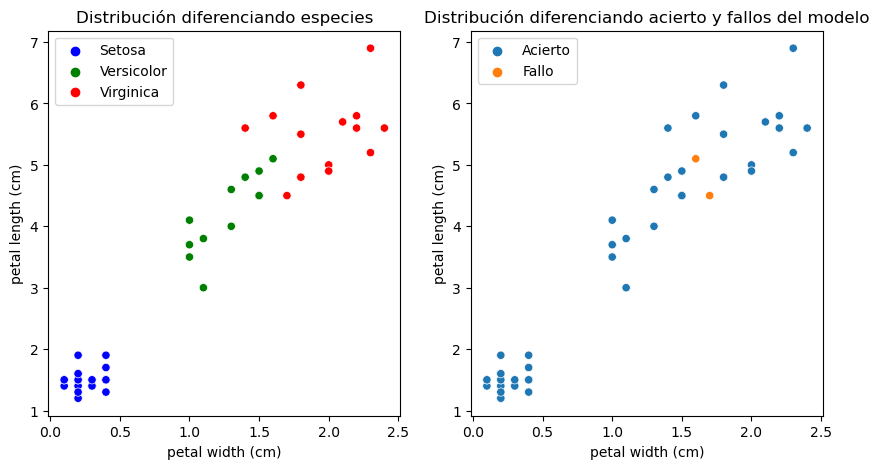

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

X_test_mas_targets = X_test
X_test_mas_targets['target'] = data['target'] # Aunque 'data' y 'X_test' estén desordenados y tengan distinto número de elementos, parece que gracias a que se conserva el índice entre los dos añade bien la columna 'target'

# Creamos la figura

plt.figure(figsize=(10, 5))


# Crear el primer gráfico

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
ax1 = sns.scatterplot(data=X_test_mas_targets, x='petal width (cm)', y='petal length (cm)', hue='target', palette=['blue', 'green', 'red'])
plt.title('Distribución diferenciando especies')

# Renombrar las etiquetas de la leyenda.
handles, labels = ax1.get_legend_handles_labels()
nombres_especies = ['Setosa', 'Versicolor', 'Virginica']
ax1.legend(handles = handles, labels = nombres_especies)


# Crear el segundo gráfico
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
ax2 = sns.scatterplot(data=X_test, x='petal width (cm)', y='petal length (cm)', hue=colors, alpha=1)
plt.title('Distribución diferenciando acierto y fallos del modelo')

# Renombrar las etiquetas de la leyenda
handles, labels = ax2.get_legend_handles_labels()
aciertos_fallos = ['Acierto', 'Fallo']
ax2.legend(handles = handles, labels = aciertos_fallos)

# Mostrar los gráficos
plt.show()

Mirando al anterior gráfico queda muy claro que el modelo se equivoca en aquellos casos en que el dato se encuentra en la región donde se juntan las distribuciones de Versicolor y Virginica. Esto es lo mismo que le ocurría al modelo de la tarea anterior, y es que al estar tan juntas las distribuciones de esas dos especies, en cuando tenemos un individuo que se sale un poco de la media puede confundirse fácilmente con la otra especie.

Parece, por tanto, que el modelo funciona correctamente, ya que se equivoca (en pocas ocasiones) donde cabría esperar que se equivocase y acierta todos los casos 'fáciles' de identidicar a simple vista, como ocurre con todos los datos de Setosa.

## Métricas del ajuste con regresión logística

En este apartado vamos a cuantificar cómo fuciona el modelo anteriormente obtenido usando métricas.

En primer lugar, representa la [matriz de confusión](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) y explica el significado de las entradas fuera de la diagonal.

In [8]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

matriz_confusion = confusion_matrix(y_test.values, prediction)
nombres_especies_mas_total_matriz_confusion_filas = [f'{nombres_especies[0]}(total = {sum(matriz_confusion[0, :])})',
                                                     f'{nombres_especies[1]} (total = {sum(matriz_confusion[1, :])})',
                                                     f'{nombres_especies[2]} (total = {sum(matriz_confusion[2, :])})']

nombres_especies_mas_total_matriz_confusion_columnas = [f'{nombres_especies[0]}\n(total = {sum(matriz_confusion[:, 0])})',
                                                        f'{nombres_especies[1]}\n(total = {sum(matriz_confusion[:, 1])})',
                                                        f'{nombres_especies[2]}\n(total = {sum(matriz_confusion[:, 2])})']


datos_tabla = {'Real ↓ \Predicho →': nombres_especies_mas_total_matriz_confusion_filas,
               nombres_especies_mas_total_matriz_confusion_columnas[0]: matriz_confusion[:, 0],
               nombres_especies_mas_total_matriz_confusion_columnas[1]: matriz_confusion[:, 1],
               nombres_especies_mas_total_matriz_confusion_columnas[2]: matriz_confusion[:, 2]}

print(tabulate(datos_tabla, headers="keys", numalign="center"))

Real ↓ \Predicho →           Setosa        Versicolor      Virginica
                          (total = 21)    (total = 15)    (total = 14)
-----------------------  --------------  --------------  --------------
Setosa(total = 21)             21              0               0
Versicolor (total = 14)        0               13              1
Virginica (total = 15)         0               2               13


La matriz de confusión nos permite comprobar de un vistazo a qué target han ido las predicciones del modelo. Los targets reales son las filas, y los predichos las columnas. De forma que el número de acierto se encuentra en la diagonal.

Podemos ver que las Setosa las ha acertado todas, mientras que ha fallado una vez clasificando Versicolor por Virginica y 2 veces en el caso inverso.

---------------

Ahora vamos a extraer algunas métricas cuantitativas concretas. Muchas de estas métricas se refieren a la detección respecto a un valor concreto de la clase. Por ejemplo, si llamamos a ```precision_score``` para obtener la precisión, lo haremos configurando su parámetro ```average``` a ```None``` para obtener tres valores de precisión, uno referido a cada una de las clases.

Como mínimo se pide calcular la [exactitud/accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) (que no depende de la clase) y explicar con palabras su significado; así como las tres [precisiones/precisions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) y su interpretación. Puedes intentar relacionarlas con la matriz de confusión para explicar el origen de la métrica.

**Opcionalmente**, se puede calcular e interpretar también la [exhaustividad/recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) y el [F1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test.values, prediction, normalize = True)
precisions = precision_score(y_test.values, prediction, average = None)
recall = recall_score(y_test.values, prediction, average = None)
f1 = f1_score(y_test.values, prediction, average = None)
print(f'Acurracy: {accuracy}')
print(f'Precision: \t{precisions}')
print(f'Recall: \t{recall}')
print(f'F1: \t\t{f1}')

print('\n-----------------------------------------------------------------------\n' ,tabulate(datos_tabla, headers="keys", numalign="center"))

Acurracy: 0.94
Precision: 	[1.         0.86666667 0.92857143]
Recall: 	[1.         0.92857143 0.86666667]
F1: 		[1.         0.89655172 0.89655172]

-----------------------------------------------------------------------
 Real ↓ \Predicho →           Setosa        Versicolor      Virginica
                          (total = 21)    (total = 15)    (total = 14)
-----------------------  --------------  --------------  --------------
Setosa(total = 21)             21              0               0
Versicolor (total = 14)        0               13              1
Virginica (total = 15)         0               2               13


- **Accuracy/exactitud**: Indica el porcentaje de las predicciones que fueron correctas sin distinguir entre especies. Si nos fijamos en la matriz de confusión sería la suma de los elementos de la diagonal entre el número total de datos.

- **Precisiones/precisions**: Como pone en la documentación, la precisión es el ratio $$\frac{tp}{(tp + fp)},$$donde $tp$ es número de verdades positivos y $fp$ el número de falsos positivos.
Indica el porcentaje de los positivos que son verdaderos positivos para cada especie.
Que la precisón para una cierta especie sea igual a $1$ no tiene por qué significar que todas las entradas de una cierta especie las clasifique correctamente, sino que siempre que el modelo cree que la entrada es de una cierta especie, está en lo correcto.
A partir de la matriz de confusión podemos obternerlas para cada columna/especie si dividimos el número de la diagonal entre la suma de todos los elementos de la columna.

- **Exhaustividad/Recall**: En la documentación pone que podemos calcularla de la siguiente forma, $$\frac{tp}{tp + fn},$$ donde $tp$ es el número de verdaderos positivos y $fn$ el número de falsos negativos.
A partir de la matriz de confusión la podemos calcular para cada especie/fila como el valor de la diagonal entre la suma de los valores de la fila.
Indica el porcentaje de datos de cada especie que el modelo supo clasificar correctamente.

- **Test F1**: En la documentación podemos ver que este índice se calcula de la siguiente manera, $$F1 = \frac{2 TP}{2 TP + FP + FN},$$ donde $TP$ es el número de verdaderos positivos, $FN$ es el número de falsos negativos y $FP$ el número de falsos positivos.
En la documentación también se comenta que se puede interpretar como una media armónica entre la precisión y la exhastividad, que tienen la misma contribución relativa en la anterior fórmula. Esto lo podemos ver reflejado en el hecho de que para las dos últimas especies el valor del índice F1 es el mismo. Esto se debe a la simetría que podemos observar entre los valores de precisión y exhaustividad de la segunda y tercera especie.

## Comparativa de modelos en scikit-learn

Ahora vamos a entrenar múltiples modelos de clasificación usando scikit-learn, con un **mínimo de 3**. Algunos algoritmos que se pueden usar para ello son:

- Regresión logística
- [Máquinas de vectores de soporte](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [Vecinos más cercanos](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
- [Modelos Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) (los diferentes métodos se basan en suponer que las distribuciones de probabilidad de los atributos individuales siguen una u otra distribución de probabilidad. Esto puede ser importante para explicar su desempeño).
- [Árboles de decisión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
- [Bosques aleatorios](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) (método de ensamble basado en árboles de decisión)
- [Gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) (método de ensamble basado en árboles que se corrigen unos a otros progresivamente).

Entrénalos con el mismo conjunto de entrenamiento y obten las predicciones para el conjunto de prueba, guardándolas para usarlas después. Puedes utilizar estructuras de datos como listas o diccionarios para hacer la manipulación más sencilla.

In [10]:
modelo_logistico = model

In [11]:
X_test = X_test.drop('target', axis=1)

In [12]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Seleccionamos algunos de los de arriba

# Modelo logístico (el que ya hemos entrenado)

modelo_logistico = model
prediction_modelo_logistico = prediction

# Máquina de vectores de soporte

modelo_maquina_vectores_soporte = SVC(gamma='auto', random_state = 2024).fit(X_train, y_train)
prediction_maquina_vectores_soporte = modelo_maquina_vectores_soporte.predict(X_test)

# Vecinos más cercanos

modelo_vecinos_mas_ceranos = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
prediction_vecinos_mas_ceranos = modelo_vecinos_mas_ceranos.predict(X_test)

# Modelo Random Forest

modelo_random_forest = RandomForestClassifier(random_state = 2024).fit(X_train, y_train)
prediction_random_forest = modelo_random_forest.predict(X_test)

# Modelo Gradient Boosting

modelo_gradient_boosting = GradientBoostingClassifier(random_state = 2024).fit(X_train, y_train)
prediction_gradient_boosting = modelo_gradient_boosting.predict(X_test)

Recupera tu modelo "hecho a mano" del ejercicio anterior y evalúalo sobre el conjunto de pruebas. (Técnicamente tiene sesgo, porque tú ya has visto ese subconjunto de datos y puede haber influido en tu decisión, pero obviaremos esa consideración).

In [13]:
target_0 = data.loc[data['target'] == 0]
target_1 = data.loc[data['target'] == 1]
target_2 = data.loc[data['target'] == 2]

def modelo_hecho_a_mano(sepal_length_entrada, sepal_width_entrada, petal_length_entrada, petal_width_entrada):

    # Calculamos los centros de las distribuciones de puntos para cada uno de los grupos

    petal_width_0_media = target_0['petal width (cm)'].mean()
    petal_length_0_media = target_0['petal length (cm)'].mean()

    petal_width_1_media = target_1['petal width (cm)'].mean()
    petal_length_1_media = target_1['petal length (cm)'].mean()

    petal_width_2_media = target_2['petal width (cm)'].mean()
    petal_length_2_media = target_2['petal length (cm)'].mean()

    # Calculamos la distancia euclídea del punto de entrada en el plano petal length - petal width

    diferencia_petal_width_0 = petal_width_0_media - petal_width_entrada
    diferencia_petal_length_0 = petal_length_0_media - petal_length_entrada

    diferencia_petal_width_1 = petal_width_1_media - petal_width_entrada
    diferencia_petal_length_1 = petal_length_1_media - petal_length_entrada

    diferencia_petal_width_2 = petal_width_2_media - petal_width_entrada
    diferencia_petal_length_2 = petal_length_2_media - petal_length_entrada

    distancia_0 = np.sqrt(diferencia_petal_width_0**2 + diferencia_petal_length_0**2)
    distancia_1 = np.sqrt(diferencia_petal_width_1**2 + diferencia_petal_length_1**2)
    distancia_2 = np.sqrt(diferencia_petal_width_2**2 + diferencia_petal_length_2**2)
    """ print(f'distancia 0: {distancia_0}')
    print(f'distancia 1: {distancia_1}')
    print(f'distancia 2: {distancia_2}') """


    #Pintamos el resultado

    """ sns.scatterplot(data, x = 'petal width (cm)', y = 'petal length (cm)', hue='target', palette=['blue', 'green', 'red'])
    plt.scatter(petal_width_entrada, petal_length_entrada, color='orange', label='Nuevo Punto')
    plt.legend() """


    # Elegimos la distancia menor

    if distancia_0 < distancia_1 and distancia_0 < distancia_2:
        return 0.0
    elif distancia_1 < distancia_0 and distancia_1 < distancia_2:
        return 1.0
    elif distancia_2 < distancia_0 and distancia_2< distancia_1:
        return 2.0
    else:
        print('No se ha podido clasificar la entrada.')
        return np.nan

In [14]:
# Sacamos la predicción del modelo hecho a mano

prediction_hecho_a_mano = []
for index, row in X_test.iterrows():

    salida = modelo_hecho_a_mano(row['sepal length (cm)'], row['sepal width (cm)'], row['petal length (cm)'], row['petal width (cm)'])

    prediction_hecho_a_mano.append(salida)

In [15]:
# Calculamos las precisiones y las matrices de confusión

diccionario_parametros = {
    'Modelo': ['Logístico', 'Máquina de vectores de soporte', 'Vecinos más cercanos', 'Modelo random forest', 'Modelo gradient boosting', 'Modelo hecho a mano'],
    'Exactitud': [
        accuracy_score(y_test.values, prediction_modelo_logistico, normalize=True),
        accuracy_score(y_test.values, prediction_maquina_vectores_soporte, normalize=True),
        accuracy_score(y_test.values, prediction_vecinos_mas_ceranos, normalize=True),
        accuracy_score(y_test.values, prediction_random_forest, normalize=True),
        accuracy_score(y_test.values, prediction_gradient_boosting, normalize=True),
        accuracy_score(y_test.values, prediction_hecho_a_mano, normalize=True)
    ],
    'Matriz de\nconfusión': [
        confusion_matrix(y_test.values, prediction_modelo_logistico),
        confusion_matrix(y_test.values, prediction_maquina_vectores_soporte),
        confusion_matrix(y_test.values, prediction_vecinos_mas_ceranos),
        confusion_matrix(y_test.values, prediction_random_forest),
        confusion_matrix(y_test.values, prediction_gradient_boosting),
        confusion_matrix(y_test.values, prediction_hecho_a_mano)
    ],
    'Precisión': [
        precision_score(y_test.values, prediction_modelo_logistico, average = None),
        precision_score(y_test.values, prediction_maquina_vectores_soporte, average = None),
        precision_score(y_test.values, prediction_vecinos_mas_ceranos, average = None),
        precision_score(y_test.values, prediction_random_forest, average = None),
        precision_score(y_test.values, prediction_gradient_boosting, average = None),
        precision_score(y_test.values, prediction_hecho_a_mano, average = None)
    ],
    'Exhaustividad': [
        recall_score(y_test.values, prediction_modelo_logistico, average = None),
        recall_score(y_test.values, prediction_maquina_vectores_soporte, average = None),
        recall_score(y_test.values, prediction_vecinos_mas_ceranos, average = None),
        recall_score(y_test.values, prediction_random_forest, average = None),
        recall_score(y_test.values, prediction_gradient_boosting, average = None),
        recall_score(y_test.values, prediction_hecho_a_mano, average = None)
    ],
    'F1': [
        f1_score(y_test.values, prediction_modelo_logistico, average = None),
        f1_score(y_test.values, prediction_maquina_vectores_soporte, average = None),
        f1_score(y_test.values, prediction_vecinos_mas_ceranos, average = None),
        f1_score(y_test.values, prediction_random_forest, average = None),
        f1_score(y_test.values, prediction_gradient_boosting, average = None),
        f1_score(y_test.values, prediction_hecho_a_mano, average = None)
    ]
}




Construye una tabla resumen con alguna de las métricas, justificando con ello qué modelos funcionan mejor.

In [16]:
print(tabulate(diccionario_parametros, headers='keys', tablefmt="grid", numalign="center"))

+--------------------------------+-------------+--------------+------------------------------------+------------------------------------+------------------------------------+
| Modelo                         |  Exactitud  | Matriz de    | Precisión                          | Exhaustividad                      | F1                                 |
|                                |             | confusión    |                                    |                                    |                                    |
+================================+=============+==============+====================================+====================================+====================================+
| Logístico                      |    0.94     | [[21  0  0]  | [1.         0.86666667 0.92857143] | [1.         0.92857143 0.86666667] | [1.         0.89655172 0.89655172] |
|                                |             |  [ 0 13  1]  |                                    |                         

Poner muchas métrica siempre está bien, pero para este caso tan sencillo parece que es suficiente con mirar a la columna de 'Exactitud' y de 'Matriz de confusión'.

Parece que el modelo que consigue más exactitud, al menos con los datos de test que hemos proporcionado, es el modelo de máquina de vectores de soporte. Mirando a la matriz de confusión observamos que todos tienen el mismo comportamiento: la primera especie, que es la que se distingue más claramente, la aciertan siempre, mientras que con las otras dos se confunden en algún caso. El comportamiento es muy similar, y aunque el porcentaje de aciertos varía notablemente (aunque poco), tenemos que tener en cuenta que el conjunto que estamos considerando tiene muy pocos datos, de forma que un par más o menos de aciertos puede hacer que la precisión suba o baje más rápido de lo que podríamos esperar.

# Entrenamiento y evaluación con validación cruzada

**Apartado opcional, mayor dificultad**

Opcionalmente, puedes hacer una evaluación más fina usando validación cruzada con la función [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html). En su argumento ```scoring``` puedes configurar qué métricas se evalúan, pero con la dificultad de que hay que tomar algún criterio para promediar las puntuaciones de cada cada clase. Por ejemplo, puedes añadir ```"precision_macro"``` para que se agreguen con el criterio de agregación macro (ver, por ejemplo, [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)).

Con esto, construye una evaluación con validación cruzada de algunos algoritmos de scikit-learn.

## Modelado con tensorflow

**Apartado opcional, mayor dificultad**

Construye un modelo utilizando tensorflow.

Para la carga de datos desde pandas puede ser útil [este tutorial](https://www.tensorflow.org/tutorials/load_data/pandas_dataframe). Observa que la red que construyen ahí está pensada para regresión y por eso tiene una única neurona en la salida. En este caso habrá que colocar una por cada clase, además de utilizar una función de pérdida adecuada. Puedes revisar el [tutorial básico](https://www.tensorflow.org/tutorials/quickstart/beginner) para más información.


In [17]:
import tensorflow as tf

X_train_tensor = tf.convert_to_tensor(X_train) # No debería hacer falta, pero por si acaso
X_test_tensor = tf.convert_to_tensor(X_test) # No debería hacer falta, pero por si acaso

2024-02-27 11:54:30.490738: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 11:54:32.854923: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
modelo_tensorflow = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)), # Importante la coma en '4,' para que lo interpreste correctamente
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')
])


modelo_tensorflow.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Usamos esta función de pérdida, ya que parece que es adecuada para el caso en que las etiquetas son enteros.
              metrics=['accuracy'])


In [19]:
history = modelo_tensorflow.fit(X_train_tensor, y_train.values, epochs=15, validation_data = [X_test_tensor, y_test.values])


Epoch 1/15
4/4 [==============================] - 1s 124ms/step - loss: 1.1035 - accuracy: 0.2900 - val_loss: 1.0764 - val_accuracy: 0.3200
Epoch 2/15
4/4 [==============================] - 0s 42ms/step - loss: 1.0526 - accuracy: 0.4400 - val_loss: 0.9579 - val_accuracy: 0.3600
Epoch 3/15
4/4 [==============================] - 0s 71ms/step - loss: 1.0354 - accuracy: 0.3900 - val_loss: 0.8753 - val_accuracy: 0.7200
Epoch 4/15
4/4 [==============================] - 0s 62ms/step - loss: 1.0129 - accuracy: 0.4300 - val_loss: 0.8227 - val_accuracy: 0.7200
Epoch 5/15
4/4 [==============================] - 0s 65ms/step - loss: 0.8503 - accuracy: 0.6500 - val_loss: 0.7795 - val_accuracy: 0.7200
Epoch 6/15
4/4 [==============================] - 0s 76ms/step - loss: 0.9261 - accuracy: 0.5900 - val_loss: 0.7346 - val_accuracy: 0.7200
Epoch 7/15
4/4 [==============================] - 0s 42ms/step - loss: 0.7909 - accuracy: 0.7000 - val_loss: 0.6985 - val_accuracy: 0.7200
Epoch 8/15
4/4 [==========

In [20]:
modelo_tensorflow.evaluate(X_test_tensor, y_test.values, verbose=2)


2/2 - 0s - loss: 0.5300 - accuracy: 0.7800 - 105ms/epoch - 53ms/step


[0.5300427675247192, 0.7799999713897705]

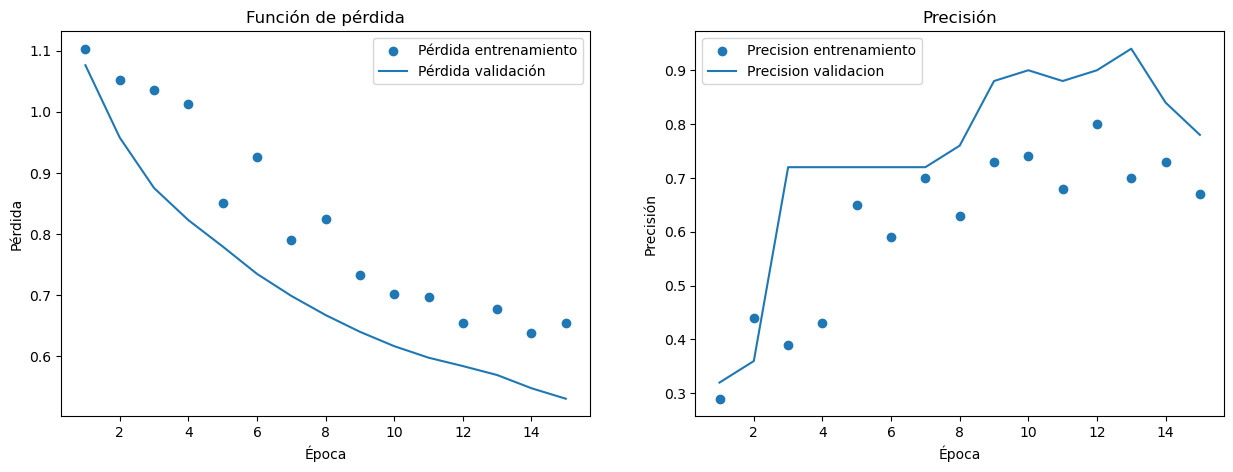

In [21]:
# Graficamos ahora la función de pérdida y la precisión

perdida = history.history['loss']
perdida_conjunto_validacion = history.history['val_loss']
precision = history.history['accuracy']
precision_conjunto_validacion = history.history['val_accuracy']
epocas = range(1, len(perdida) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graficar la pérdida
axes[0].scatter(epocas, perdida, label='Pérdida entrenamiento')
axes[0].plot(epocas, perdida_conjunto_validacion, label='Pérdida validación')
axes[0].set_title('Función de pérdida')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Pérdida')
axes[0].legend()

# Graficar la precisión
axes[1].scatter(epocas, precision, label='Precision entrenamiento')
axes[1].plot(epocas, precision_conjunto_validacion, label='Precision validacion')
axes[1].set_title('Precisión')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Precisión')
axes[1].legend()


#plt.tight_layout()

plt.show()

Vemos que ambas funciones de pérdida van disminuyendo mientras que las precisiones aumentan. En el caso de la precisión de validación parece que llega a una especie de máximo. Como la tendencia de la función de pérdida es seguir disminuyendo, puede ser buena idea entrenar al modelo más tiempo.

In [22]:
history = modelo_tensorflow.fit(X_train_tensor, y_train.values, epochs=100, validation_data = [X_test_tensor, y_test.values])

Epoch 1/100
4/4 [==============================] - 0s 98ms/step - loss: 0.6327 - accuracy: 0.7000 - val_loss: 0.5131 - val_accuracy: 0.8400
Epoch 2/100
4/4 [==============================] - 0s 57ms/step - loss: 0.6714 - accuracy: 0.6500 - val_loss: 0.5005 - val_accuracy: 0.9000
Epoch 3/100
4/4 [==============================] - 0s 68ms/step - loss: 0.6142 - accuracy: 0.7300 - val_loss: 0.4896 - val_accuracy: 0.9400
Epoch 4/100
4/4 [==============================] - 0s 58ms/step - loss: 0.6116 - accuracy: 0.7500 - val_loss: 0.4838 - val_accuracy: 0.9600
Epoch 5/100
4/4 [==============================] - 0s 67ms/step - loss: 0.6008 - accuracy: 0.7500 - val_loss: 0.4771 - val_accuracy: 0.9400
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 0.5794 - accuracy: 0.7800 - val_loss: 0.4671 - val_accuracy: 0.9600
Epoch 7/100
4/4 [==============================] - 0s 28ms/step - loss: 0.5307 - accuracy: 0.7600 - val_loss: 0.4553 - val_accuracy: 0.8800
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 54ms/step - loss: 0.3481 - accuracy: 0.8800 - val_loss: 0.2993 - val_accuracy: 0.9200
Epoch 43/100
4/4 [==============================] - 0s 54ms/step - loss: 0.3429 - accuracy: 0.9000 - val_loss: 0.2957 - val_accuracy: 0.9200
Epoch 44/100
4/4 [==============================] - 0s 49ms/step - loss: 0.3702 - accuracy: 0.9000 - val_loss: 0.2933 - val_accuracy: 0.9200
Epoch 45/100
4/4 [==============================] - 0s 37ms/step - loss: 0.3947 - accuracy: 0.8000 - val_loss: 0.2886 - val_accuracy: 0.9200
Epoch 46/100
4/4 [==============================] - 0s 44ms/step - loss: 0.3312 - accuracy: 0.9300 - val_loss: 0.2856 - val_accuracy: 0.9200
Epoch 47/100
4/4 [==============================] - 0s 35ms/step - loss: 0.3550 - accuracy: 0.8900 - val_loss: 0.2830 - val_accuracy: 0.9200
Epoch 48/100
4/4 [==============================] - 0s 44ms/step - loss: 0.3355 - accuracy: 0.9100 - val_loss: 0.2826 - val_accuracy: 0.9200
Epoch 49/100
4/4 [========

In [23]:
modelo_tensorflow.evaluate(X_test_tensor, y_test.values, verbose=2)

2/2 - 0s - loss: 0.1850 - accuracy: 0.9200 - 40ms/epoch - 20ms/step


[0.184955894947052, 0.9200000166893005]

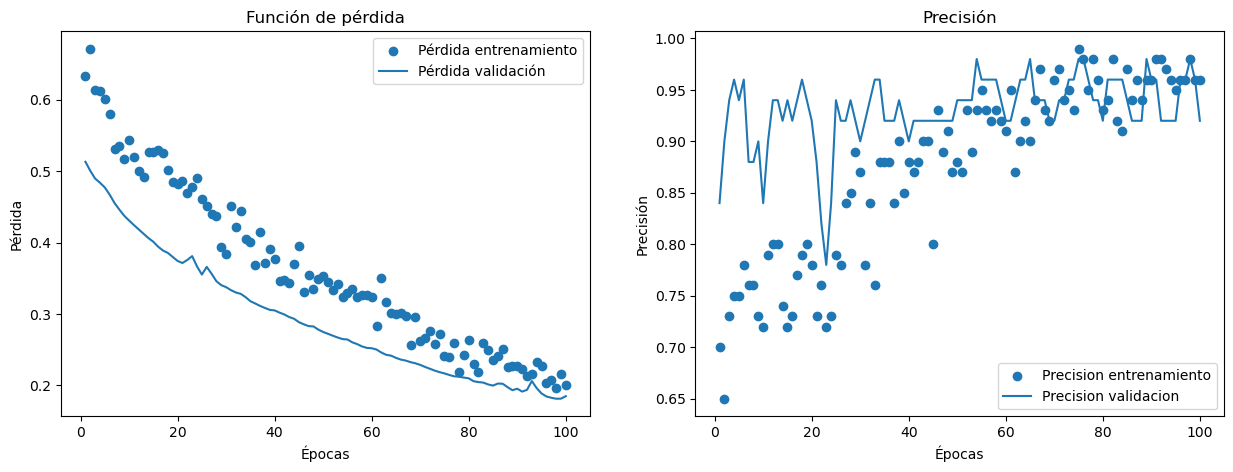

In [24]:
# Graficamos ahora la función de pérdida y la precisión

perdida = history.history['loss']
perdida_conjunto_validacion = history.history['val_loss']
precision = history.history['accuracy']
precision_conjunto_validacion = history.history['val_accuracy']
epocas = range(1, len(perdida) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graficar la pérdida
axes[0].scatter(epocas, perdida, label='Pérdida entrenamiento')
axes[0].plot(epocas, perdida_conjunto_validacion, label='Pérdida validación')
axes[0].set_title('Función de pérdida')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Pérdida')
axes[0].legend()

# Graficar la precisión
axes[1].scatter(epocas, precision, label='Precision entrenamiento')
axes[1].plot(epocas, precision_conjunto_validacion, label='Precision validacion')
axes[1].set_title('Precisión')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Precisión')
axes[1].legend()


#plt.tight_layout()

plt.show()

En efecto, las pérdidas siguen disminuyendo y las precisiones aumentando. El aumento de épocas de entrenamiento en la función de pérdida se nota mucho con respecto al caso anterior, pero esto no ocurre de manera tan clara en la precisión, ya que llega un momento en que los valores de la precisión empieza a oscilar, lo que causa que se una época a otra que están muy cercanas entre sí haya una diferencia de precisión considerable.
 
Podemos observar que sobre el conjunto de entrenamiento obtenemos precisiones muy altas, de hasta el 100% (depende la aleatoriedad de la ejecución. En algunos casos nos podemos quedar con valores muy cercanos al 100% pero no llegar a él), lo que quizás no es muy realista y podría ser síntoma de sobre-entrenamiento. Por otro lado, en el conjunto de validación el máximo de precisión es del 98% (de nuevo, esto dependerá de cada ejecución, pero parece más estable que el dato anterior). Este número no está muy alejado del 96% que obtuvimos como máximo con los modelos anteriores, pero esto significa que el modelo se está equivocando en un solo caso (en los casos extremos donde se alcanza esa precisión tan alta). Sabemos que hay más de un solo caso ambiguo en los datos, por lo que esto puede ser otra muestra de sobre-entrenamiento.

De hecho, quizás el que observemos oscilaciones tambien es un efecto más de este posible sobre-entrenamiento, casadas por el parámetro de 'Dropout'. Esto es, hay algunas neuronas que se han aprendido algún dato de memoria. Si en la siguiente época ésta neurona se desactiva, observaríamos una disminución en la precisión. Esto resulta creíble, ya que en el tramo oscilante la disminución de la precisión no es muy alta en la mayoría de casos (un 2% menos indica un error más, ya que tenemos 50 datos), lo que indica uno o dos fallos más en la mayoría de casos, números que se acercan mucho a los de los anteriores modelos.